In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from dateutil.relativedelta import relativedelta

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.style.use('seaborn')
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'IPAexGothic'

# Ch.03 顧客の全体像を把握する１０本ノック

スポーツジムの会員データを使って顧客の行動を分析する。  
これまでと同様にまずはデータを理解し、加工した後、  
顧客の行動データを分析していく。  
ここでは、機械学習に向けての初期分析を行う。

データ概要

- use_log.csv
  - ジムの利用履歴データ
  - 2018-04~2019-03
- customer_master.csv
  - 2019-03末時点の会員データ
- class_master.csv
  - 会員区分データ（オールタイム・デイタイム・ナイト）
- campaign_master.csv
  - キャンペーン区分データ（入会無料等）

### Knock21: データの読み込み

In [2]:
# 利用履歴データの読み込み

uselog = pd.read_csv("../support/3章/use_log.csv")
print(uselog.shape)
display(uselog.head())
display(uselog.tail())

(197428, 3)


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


,log_id,customer_id,usedate
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31
197427,L00000049209757,TS999079,2019-03-31


In [3]:
# 会員データの読み込み

customer = pd.read_csv("../support/3章/customer_master.csv")
print(customer.shape)
display(customer.head())
display(customer.tail())

(4192, 8)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4191,IK692635,XXXXX,C02,F,2019-03-15 00:00:00,NaN,CA1,0


In [4]:
# 会員区分データの読み込み

class_master = pd.read_csv("../support/3章/class_master.csv")
print(class_master.shape)
display(class_master.head())

(3, 3)


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [5]:
# キャンペーン区分データの読み込み

campaign_master = pd.read_csv("../support/3章/campaign_master.csv")
print(campaign_master.shape)
display(campaign_master.head())

(3, 2)


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


### Knock22: 顧客データを整形する

In [6]:
# 顧客データを主に、レフトジョインする

customer_join = pd.merge(
    customer, class_master,
    on="class",
    how="left"
)
customer_join = pd.merge(
    customer_join, campaign_master,
    on="campaign_id",
    how="left"
)

print(customer.shape)
print(customer_join.shape)
display(customer_join.head())
display(customer_join.tail())

(4192, 8)
(4192, 11)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4191,IK692635,XXXXX,C02,F,2019-03-15 00:00:00,NaN,CA1,0,デイタイム,7500,通常


In [7]:
# 欠損値の確認

customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### Knock23: 顧客データを基礎集計する

In [8]:
# 顧客データの集計（会員区分別）

customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [9]:
# 顧客データの集計（キャンペーン区分別）

customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [10]:
# 顧客データの集計（性別）

customer_join.groupby("gender").count()["customer_id"]


gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [11]:
# 顧客データの集計（退会者）

customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [12]:
# 入会人数の集計

# datetime型に変換
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])

customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(customer_start.shape)

(1361, 11)


### Knock24: 最新顧客データを基礎集計する

In [13]:
# 最新月に在籍していたユーザーを絞り込む

# datetime型に変換
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])

# "20190331"以降に退会した会員 or 在籍中の会員
customer_newer = customer_join.loc[
    (customer_join["end_date"] >= pd.to_datetime("20190331")) | 
    (customer_join["end_date"].isna())
]
print(customer_newer.shape)
customer_newer["end_date"].unique()

(2953, 11)


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [14]:
# 最新月顧客の集計

# 会員区分別
print(customer_newer.groupby("class_name").count()["customer_id"], "\n")
# キャペーン区分別
print(customer_newer.groupby("campaign_name").count()["customer_id"], "\n")
# 性別別
print(customer_newer.groupby("gender").count()["customer_id"])

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64 

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64 

gender
F    1400
M    1553
Name: customer_id, dtype: int64


### Knock25: 利用履歴データを集計する

In [15]:
# 利用履歴データの再確認

print(uselog.shape)
display(uselog.head())

(197428, 3)


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [16]:
# 顧客ごとの月別利用回数の集計

# datetime型に変換
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
# "年月"列の追加
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")

# 顧客ごとの月別利用回数の集計して新しいデータフレームを作る
uselog_month = uselog.groupby(["年月", "customer_id"], as_index=False).count()
# "log_id"列名を"count"に変更
uselog_month.rename(columns={"log_id": "count"}, inplace=True)
# "usedate"列の削除
del uselog_month["usedate"]

print(uselog_month.shape)
display(uselog_month.head())
display(uselog_month.tail())

(36842, 3)


,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


,年月,customer_id,count
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6
36841,201903,TS999855,4


In [17]:
# 顧客ごとの平均値、中央値、最大値、最小値を集計する

uselog_customer = uselog_month.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
# indexに入っている"customer_id"をカラムに移動し、indexを振り直す
uselog_customer = uselog_customer.reset_index(drop=False)

print(uselog_customer.shape)
display(uselog_customer.head())
display(uselog_customer.tail())

(4192, 5)


,customer_id,mean,median,max,min
0,AS002855,4.5000,5.0000,7,2
1,AS008805,4.0000,4.0000,8,1
2,AS009013,2.0000,2.0000,2,2
3,AS009373,5.0833,5.0000,7,3
4,AS015233,7.5455,7.0000,11,4


,customer_id,mean,median,max,min
4187,TS995853,9.5000,9.5000,11,8
4188,TS998593,8.1429,8.0000,9,7
4189,TS999079,4.9167,5.5000,9,2
4190,TS999231,4.6667,5.0000,8,1
4191,TS999855,4.5833,4.0000,7,3


### Knock26: 利用顧客データから定期利用フラグを作成する

- 顧客ごとに、各月の曜日別に集計する
- 最大値が「4」以上の曜日が1ヶ月でもあった顧客にフラグ「1」とする

In [18]:
# 顧客ごとに、各月の曜日別に集計する
# 0~6: 月~日 

uselog["weekday"] = uselog["usedate"].dt.weekday

uselog_weekday = uselog.groupby(
    ["customer_id", "年月", "weekday"], as_index=False
).count()[["customer_id", "年月", "weekday", "log_id"]]
uselog_weekday.rename(columns={"log_id": "count"}, inplace=True)

print(uselog_weekday.shape)
display(uselog_weekday.head())
display(uselog_weekday.tail())

(93333, 4)


,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


,customer_id,年月,weekday,count
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4
93332,TS999855,201903,5,4


In [19]:
# 顧客ごとに、各月の最大値を取得し、
# 最大値「4」以上の場合はフラグを立てる

uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]

uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"] < 4, 1)

display(uselog_weekday)

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


### Knock27: 顧客データと利用履歴データを結合する

- `uselog_customer`、`uselog_weekday`、`customer_join`の結合

In [20]:
# 各データの再確認

display(uselog_customer)
display(uselog_weekday)
display(customer_join)

,customer_id,mean,median,max,min
0,AS002855,4.5000,5.0000,7,2
1,AS008805,4.0000,4.0000,8,1
2,AS009013,2.0000,2.0000,2,2
3,AS009373,5.0833,5.0000,7,3
4,AS015233,7.5455,7.0000,11,4
...,...,...,...,...,...
4187,TS995853,9.5000,9.5000,11,8
4188,TS998593,8.1429,8.0000,9,7
4189,TS999079,4.9167,5.5000,9,2
4190,TS999231,4.6667,5.0000,8,1


,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


In [21]:
# `uselog_customer`、`uselog_weekday`、`customer_join`の結合

customer_join = pd.merge(
    customer_join, uselog_customer,
    on="customer_id",
    how="left"
)
customer_join = pd.merge(
    customer_join, uselog_weekday[["customer_id", "routine_flg"]],
    on="customer_id",
    how="left"
)

display(customer_join)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.8333,5.0000,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.0833,5.0000,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.5833,5.0000,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.8333,4.5000,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.9167,4.0000,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.0000,8.0000,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.0000,10.0000,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.0000,8.0000,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.0000,11.0000,11,11,0


In [22]:
# 欠損値の確認

customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

### Knock28: 会員期間を計算する

In [23]:
# 退会していない顧客は、
# "end_date"の欠損値に'20190430'を代入する

customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))

customer_join["membership_period"] = 0

for i in range(len(customer_join)):
    """
    relativedelta(
        customer_join["calc_date"].iloc[1],
        customer_join["start_date"].iloc[1]
    )
    "2019-04-30 00:00:00" - "2015-05-01 00:00:00"
        = relativedelta(years=+3, months=+11, days=+29)
    """
    delta = relativedelta(
        customer_join["calc_date"].iloc[i], 
        customer_join["start_date"].iloc[i]
    )
    # 会員期間を月単位で算出する
    customer_join.loc[i, "membership_period"] = delta.years*12 + delta.months

# データフレームの確認
display(customer_join)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.8333,5.0000,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.0833,5.0000,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.5833,5.0000,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.8333,4.5000,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.9167,4.0000,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.0000,8.0000,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.0000,10.0000,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.0000,8.0000,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.0000,11.0000,11,11,0,2019-04-30,1


### Knock29: 顧客行動の各種統計量を把握する

In [24]:
# 「"mean", "median", "max", "min"」各列の統計量の計算
# 行にある「mean」は、
# 顧客の月内平均利用回数の平均

customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.0000,4192.0000,4192.0000,4192.0000
mean,5.3331,5.2506,7.8240,3.0413
std,1.7775,1.8749,2.1690,1.9516
min,1.0000,1.0000,1.0000,1.0000
25%,4.2500,4.0000,7.0000,2.0000
50%,5.0000,5.0000,8.0000,3.0000
75%,6.4167,6.5000,9.0000,4.0000
max,12.0000,12.0000,14.0000,12.0000


In [25]:
# "routine_flg"の集計
# routine_flg=1: 決まった曜日に4回以上の利用
# routine_flg=0: 決まった曜日に4回未満の利用

customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

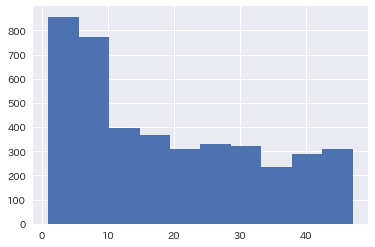

In [26]:
# 会員期間の分布

plt.hist(customer_join["membership_period"])

# 10ヶ月以内の顧客が多い

### Knock30: 退会ユーザーと継続ユーザーの違いを把握する

In [30]:
# 退会ユーザーと継続ユーザーを比較する

customer_end = customer_join.loc[customer_join["is_deleted"] == 1]
customer_stay = customer_join.loc[customer_join["is_deleted"] == 0]

print("customer_end")
display(customer_end.describe())
print("customer_stay")
display(customer_stay.describe())

customer_end


,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0000,1350.0000,1350.0000,1350.0000,1350.0000,1350.0000,1350.0000,1350.0000
mean,1.0000,8595.5556,3.8655,3.6219,6.4615,1.8215,0.4563,8.0267
std,0.0000,1949.1637,1.2464,1.2708,2.5840,0.9764,0.4983,5.0337
min,1.0000,6000.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000
25%,1.0000,6000.0000,3.0000,3.0000,4.0000,1.0000,0.0000,4.0000
50%,1.0000,7500.0000,4.0000,4.0000,7.0000,2.0000,0.0000,7.0000
75%,1.0000,10500.0000,4.6667,4.5000,8.0000,2.0000,1.0000,11.0000
max,1.0000,10500.0000,9.0000,9.0000,13.0000,8.0000,1.0000,23.0000


customer_stay


,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0000,2842.0000,2842.0000,2842.0000,2842.0000,2842.0000,2842.0000,2842.0000
mean,0.0000,8542.9275,6.0303,6.0243,8.4711,3.6207,0.9842,23.9704
std,0.0000,1977.1898,1.5536,1.5998,1.5710,2.0305,0.1249,13.7468
min,0.0000,6000.0000,3.1667,3.0000,5.0000,1.0000,0.0000,1.0000
25%,0.0000,6000.0000,4.8333,5.0000,7.0000,2.0000,1.0000,12.0000
50%,0.0000,7500.0000,5.5833,5.5000,8.0000,3.0000,1.0000,24.0000
75%,0.0000,10500.0000,7.1780,7.0000,10.0000,5.0000,1.0000,35.0000
max,0.0000,10500.0000,12.0000,12.0000,14.0000,12.0000,1.0000,47.0000


In [ ]:
# customer_joinをcsvファイルとして出力する

customer_join.to_csv("customer_join.csv", index=False)